In [95]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

# Plot for Matching Pennies (predictable adversary)

Text(0, 0.5, 'Average percent of rounds won by adversary')

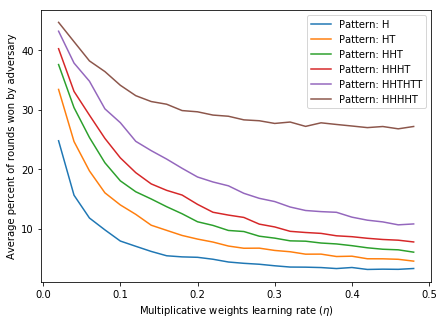

In [96]:
# Matching pennies: etas [0.02 --> 0.5, 0.02], count = 100
etas = [0.02,0.04,0.06,0.08,0.1,0.12000000000000001,0.14,0.16,0.18,0.19999999999999998,0.21999999999999997,0.23999999999999996,0.25999999999999995,0.27999999999999997,0.3,0.32,0.34,0.36000000000000004,0.38000000000000006,0.4000000000000001,0.4200000000000001,0.4400000000000001,0.46000000000000013,0.48000000000000015]
learnerscore = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]

# Data collected from running experiments
userscore0 = np.array([32.93,18.52,13.37,10.87,8.61,7.58,6.59,5.77,5.56,5.48,5.12,4.61,4.37,4.2,3.92,3.69,3.67,3.6,3.42,3.61,3.26,3.31,3.28,3.43])
userscore01 = np.array([50.14,32.7,24.54,19.09,16.27,14.17,11.84,10.77,9.73,9,8.41,7.63,7.2,7.22,6.78,6.53,6.07,6.08,5.63,5.69,5.21,5.2,5.11,4.77])
userscore001 = np.array([60.18,43.55,33.9,26.71,22.01,19.34,17.64,15.87,14.3,12.57,11.8,10.75,10.53,9.58,9.19,8.65,8.58,8.22,8.04,7.7,7.29,7.01,6.9,6.45])
userscore0001 = np.array([67.32,49.4,40.99,33.64,28.04,24.09,21.25,19.68,18.56,16.4,14.63,14.01,13.5,12.07,11.48,10.57,10.33,10.15,9.66,9.48,9.16,8.92,8.78,8.43])
userscore00001 = np.array([80.71,70.69,61.77,57.22,51.73,47.81,45.69,44.74,42.54,42.12,41.02,40.63,39.44,39.15,38.28,38.73,37.34,38.48,37.95,37.46,36.95,37.3,36.57,37.31])
userscore001011 = np.array([75.98,60.84,53.31,43.14,38.52,32.76,30.06,27.71,25.23,22.98,21.73,20.78,18.97,17.79,17.04,15.8,15.02,14.77,14.62,13.56,12.91,12.54,11.92,12.11])

# Convert to percentages
userscore0 = userscore0 / (userscore0 + 100) * 100
userscore01 = userscore01 / (userscore01 + 100) * 100
userscore001 = userscore001 / (userscore001 + 100) * 100
userscore0001 = userscore0001 / (userscore0001 + 100) * 100
userscore00001 = userscore00001 / (userscore00001 + 100) * 100
userscore001011 = userscore001011 / (userscore001011 + 100) * 100

# Plot percentages
plt.figure(figsize=(7,5))
plt.plot(etas, userscore0)
plt.plot(etas, userscore01)
plt.plot(etas, userscore001)
plt.plot(etas, userscore0001)
plt.plot(etas, userscore001011)
plt.plot(etas, userscore00001)

plt.legend(["Pattern: H", "Pattern: HT", "Pattern: HHT", "Pattern: HHHT", "Pattern: HHTHTT", "Pattern: HHHHT"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percent of rounds won by adversary")

# Plot for Rock, Paper, Scissors (predictable adversary)

Text(0, 0.5, 'Average percent of rounds won by adversary')

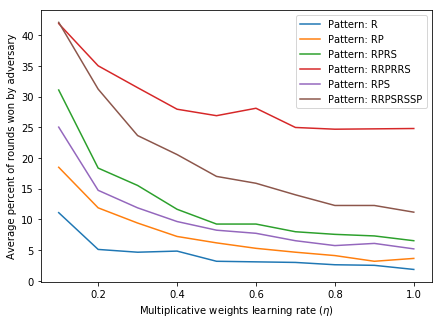

In [97]:
# Rock, paper, scissors: etas [0.1 --> 1, 0.1], count = 10
etas = [0.1,0.2,0.30000000000000004,0.4,0.5,0.6,0.7,0.7999999999999999,0.8999999999999999,0.9999999999999999]
learnerscore = [100,100,100,100,100,100,100,100,100,100]

# Data collected from running experiments
userscore0 = np.array([12.5,5.4,4.9,5.1,3.3,3.2,3.1,2.7,2.6,1.9])
userscore01 = np.array([22.7,13.5,10.4,7.8,6.6,5.6,4.9,4.3,3.3,3.8])
userscore0102 = np.array([45.1,22.5,18.4,13.2,10.2,10.2,8.7,8.2,7.9,7])
userscore001002 = np.array([72.1,53.9,45.9,38.8,36.8,39.1,33.3,32.8,32.9,33])
userscore012 = np.array([33.4,17.3,13.5,10.7,9,8.4,7,6.1,6.5,5.5])
userscore00120221 = np.array([72.7,45.4,31,25.9,20.5,18.9,16.3,14,14,12.6])

# Convert to percentages
userscore0 = userscore0 / (userscore0 + 100) * 100
userscore01 = userscore01 / (userscore01 + 100) * 100
userscore0102 = userscore0102 / (userscore0102 + 100) * 100
userscore001002 = userscore001002 / (userscore001002 + 100) * 100
userscore012 = userscore012 / (userscore012 + 100) * 100
userscore00120221 = userscore00120221 / (userscore00120221 + 100) * 100

# Plot percentages
plt.figure(figsize=(7,5))
plt.plot(etas, userscore0)
plt.plot(etas, userscore01)
plt.plot(etas, userscore0102)
plt.plot(etas, userscore001002)
plt.plot(etas, userscore012)
plt.plot(etas, userscore00120221)

plt.legend(["Pattern: R", "Pattern: RP", "Pattern: RPRS", "Pattern: RRPRRS", "Pattern: RPS", "Pattern: RRPSRSSP"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percent of rounds won by adversary")

# [NEED TO RERUN] Plot for omniscient, worst-case adversaries

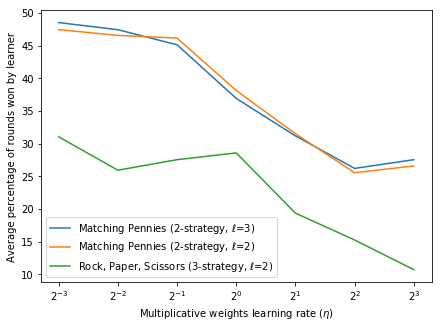

In [105]:
# Adversaries
etas = [0.125,0.25,0.5,1,2,4,8]

MP_userscore = np.array([95.3,98.9,99.4,100,100,100,100]) # average of 100
MP_learnerscore = np.array([89.8,89.2,81.7,58.5,45.3,35.5,38])
MP2_userscore = np.array([99.1,100,99.6,100,100,100,100]) # average of 100
MP2_learnerscore = np.array([89.4,87.1,85.3,61.6,46,34.3,36.2])
RPS_userscore = np.array([100,100,100,100,100,100,100]) # average of 20
RPS_learnerscore = np.array([45,35,38,40,24,18,12])

# Add up total number of rounds
MP_total = MP_userscore + MP_learnerscore
MP2_total = MP2_userscore + MP2_learnerscore
RPS_total = RPS_userscore + RPS_learnerscore

# Percentage of rounds won by the learner
MP_percent = MP_learnerscore / MP_total * 100
MP2_percent = MP2_learnerscore / MP2_total * 100
RPS_percent = RPS_learnerscore / RPS_total * 100

# Plot percentages
plt.figure(figsize=(7, 5))
plt.plot(etas, MP_percent)
plt.plot(etas, MP2_percent)
plt.plot(etas, RPS_percent)

plt.legend(["Matching Pennies (2-strategy, $\ell$=3)", "Matching Pennies (2-strategy, $\ell$=2)", "Rock, Paper, Scissors (3-strategy, $\ell$=2)"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percentage of rounds won by learner")
plt.xscale("log", basex=2)

# Probability of learner winning against adversary per round

In [319]:
def plot_expected_scores(prob_learner_win, n, h, eta):
    prob_user_win = 1 - prob_learner_win

    # Expected score after each round
    user_score = np.cumsum(prob_user_win)
    learner_score = np.cumsum(prob_learner_win)

    # Expected round T at which adversary will win
    T = np.argmax(user_score > 99.5) # gameover at 100
    learner_final = learner_score[T]
    T += 1 # to account for zero-indexing
    
    # Set up the plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Round t")
    plt.ylabel("Expected learner score")
    plt.title("N-Strategy Game (n=%d, h=%d, $\eta$=%d)" % (n, h, eta))

    # Plot expected learner score across rounds t
    plt.plot(learner_score)
    plt.legend(["Adversary", "Learner"])

    # Plot expected final score (at gameover)
    ax.plot([T], [learner_final], 'o')
    ax.annotate('(%d, %.3f)' % (T, learner_final), xy=(T+3, learner_final-5)) 

    # Expected percent of rounds the learner wins before gameover
    percent = learner_final/T*100
    print("The learner is expected to win ~%.3f%% (~%d/%d) of the rounds before losing to the adversary." % (percent, learner_final, T))

In [326]:
# Generate pattern "0"
prob_learner_win_05 = np.array([0.5,0.5,0.5,0.5,0.6224593312018539,0.7310585786300087,0.8175744761936458,0.8807970779778782,0.9241418199787577,0.9525741268224407,0.9706877692486418,0.9820137900379108,0.9890130573694043,0.9933071490757046,0.995929862284104,0.997527376843365,0.998498817743265,0.9990889488055963,0.9994472213630845,0.9996646498695405,0.9997965730219505,0.9998766054240066,0.9999251537724936,0.9999546021312968,0.999972464308886,0.9999832985781578,0.9999898700090277,0.999993855825398,0.9999962733607228,0.9999977396757059,0.9999986290427935,0.9999991684719838,0.999999495652589,0.9999996940977802,0.9999998144608953,0.999999887464849,0.9999999317439683,0.9999999586006245,0.9999999748900157,0.9999999847700131,0.9999999907625463,0.9999999943971998,0.9999999966017297,0.9999999979388433,0.9999999987498426,0.9999999992417371,0.999999999540094,0.999999999721055,0.9999999998308055,0.9999999998973833,0.9999999999377563,0.9999999999622418,0.9999999999771063,0.999999999986116,0.999999999991573,0.9999999999948841,0.999999999996902,0.9999999999981242,0.9999999999988631,0.9999999999993037,0.9999999999995737,0.9999999999997442,0.9999999999998437,0.9999999999999005,0.9999999999999432,0.9999999999999716,0.9999999999999858,0.9999999999999858,0.9999999999999858,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
prob_user_win = 1 - prob_learner_win_05

# Expected score after each round
user_score = np.cumsum(prob_user_win)
learner_score = np.cumsum(prob_learner_win_05)
T = np.argmax(learner_score > 99.5) # gameover at 100
user_final = user_score[T]
learner_final = learner_score[T]
T += 1 # to account for zero-indexing
T, user_final, learner_final, user_final + learner_final
# user_score, learner_score, T, user_final/T
# plot_expected_scores(prob_learner_win_05, n=2, h=3, eta=0.5)

(103, 3.1467329947285982, 99.8532670052714, 103.0)

The learner is expected to win ~26.471% (~36/136) of the rounds before losing to the adversary.


'00001000011001010000111011001010000111101100101000011110110010100001111011001010000111101100101000011110110010100001111011001010000111101100101000011110110010100001111011001010000111101100101000011110'

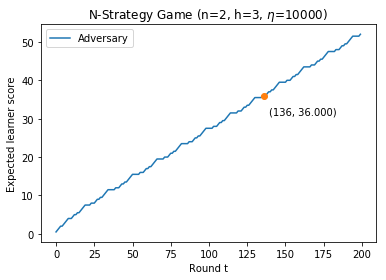

In [311]:
# When eta is INFINITY, the learner *definitely* makes mistakes
# Investigating mistake sequence (Hypothesis: corresponds to adversary input)

mistake_sequence = ''.join([str(m) for m in (prob_learner_win16 < 0.1)*1])

The learner is expected to win ~44.253% (~79/179) of the rounds before losing to the adversary.
The learner is expected to win ~32.247% (~47/148) of the rounds before losing to the adversary.
The learner is expected to win ~27.131% (~37/137) of the rounds before losing to the adversary.
The learner is expected to win ~26.471% (~36/136) of the rounds before losing to the adversary.
The learner is expected to win ~26.471% (~36/136) of the rounds before losing to the adversary.


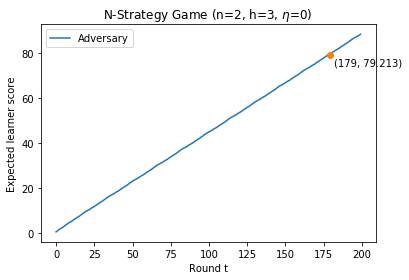

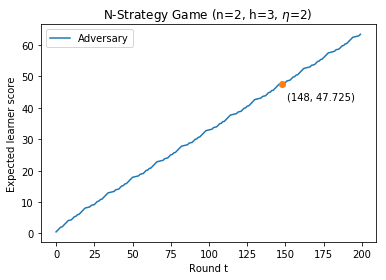

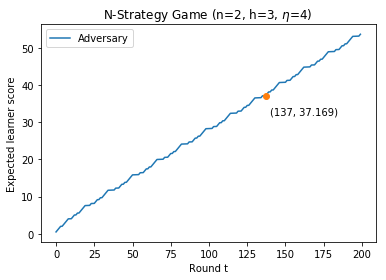

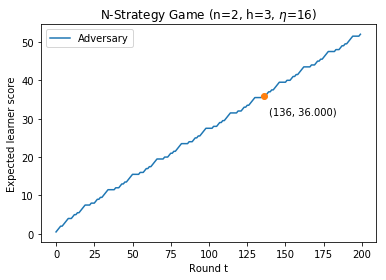

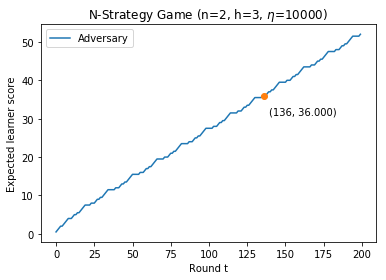

In [313]:
# Probability of winning each round
prob_learner_win_05 = np.array([0.5,0.5,0.5,0.5,0.3775406687981467,0.49999999999999956,0.4999999999999992,0.49999999999999906,0.5000000000000001,0.3775406687981456,0.37754066879814413,0.5000000000000014,0.4999999999999989,0.37754066879814574,0.4999999999999998,0.3775406687981462,0.4999999999999999,0.5000000000000001,0.4999999999999996,0.5000000000000011,0.37754066879814613,0.37754066879814624,0.37754066879814546,0.5000000000000011,0.3775406687981462,0.3775406687981456,0.4999999999999981,0.5000000000000008,0.37754066879814563,0.5000000000000011,0.37754066879814574,0.5000000000000001,0.49999999999999967,0.5000000000000014,0.5000000000000006,0.3775406687981455,0.37754066879814624,0.37754066879814613,0.37754066879814546,0.5000000000000012,0.37754066879814635,0.37754066879814546,0.4999999999999981,0.5000000000000008,0.37754066879814563,0.5000000000000011,0.37754066879814574,0.5000000000000002,0.4999999999999996,0.5000000000000014,0.5000000000000006,0.3775406687981456,0.37754066879814624,0.37754066879814613,0.3775406687981454,0.5000000000000012,0.37754066879814624,0.37754066879814546,0.499999999999998,0.5000000000000008,0.37754066879814563,0.500000000000001,0.3775406687981456,0.500000000000001,0.49999999999999983,0.5000000000000011,0.5000000000000003,0.3775406687981455,0.3775406687981461,0.3775406687981461,0.3775406687981455,0.5000000000000012,0.3775406687981462,0.37754066879814546,0.49999999999999795,0.5000000000000006,0.37754066879814563,0.5000000000000013,0.37754066879814585,0.5000000000000002,0.4999999999999997,0.5000000000000014,0.5000000000000004,0.3775406687981456,0.3775406687981462,0.3775406687981461,0.3775406687981456,0.5000000000000012,0.37754066879814635,0.37754066879814546,0.49999999999999795,0.5000000000000007,0.37754066879814563,0.5000000000000013,0.3775406687981461,0.5000000000000001,0.4999999999999996,0.5000000000000014,0.5000000000000004,0.37754066879814563,0.37754066879814613,0.377540668798146,0.3775406687981456,0.5000000000000012,0.37754066879814624,0.37754066879814546,0.49999999999999795,0.5000000000000007,0.37754066879814563,0.5000000000000013,0.377540668798146,0.5000000000000002,0.49999999999999967,0.5000000000000013,0.5000000000000003,0.37754066879814585,0.3775406687981462,0.3775406687981461,0.3775406687981456,0.5000000000000012,0.37754066879814635,0.3775406687981456,0.4999999999999982,0.5000000000000007,0.3775406687981457,0.5000000000000012,0.37754066879814563,0.5000000000000008,0.4999999999999998,0.5000000000000013,0.5000000000000003,0.37754066879814563,0.377540668798146,0.37754066879814596,0.37754066879814574,0.500000000000001,0.377540668798146,0.3775406687981462,0.5000000000000008,0.5000000000000001,0.3775406687981453,0.5000000000000011,0.3775406687981456,0.5000000000000008,0.4999999999999999,0.5000000000000012,0.5000000000000002,0.3775406687981458,0.377540668798146,0.37754066879814596,0.37754066879814585,0.5000000000000011,0.3775406687981461,0.3775406687981459,0.4999999999999999,0.5000000000000002,0.3775406687981454,0.5000000000000013,0.3775406687981457,0.5000000000000006,0.4999999999999998,0.5000000000000013,0.5000000000000004,0.3775406687981457,0.3775406687981461,0.37754066879814596,0.3775406687981456,0.5000000000000012,0.3775406687981462,0.3775406687981457,0.4999999999999993,0.5000000000000007,0.3775406687981456,0.5000000000000013,0.3775406687981459,0.5000000000000004,0.49999999999999967,0.5000000000000013,0.5000000000000003,0.37754066879814574,0.3775406687981461,0.377540668798146,0.3775406687981456,0.5000000000000012,0.3775406687981462,0.3775406687981456,0.49999999999999867,0.5000000000000006,0.37754066879814546,0.5000000000000012,0.37754066879814596,0.5000000000000004,0.49999999999999967,0.5000000000000014,0.5000000000000002,0.37754066879814574,0.3775406687981461,0.37754066879814596,0.37754066879814546,0.5000000000000011])
prob_learner_win_2 = np.array([0.5,0.5,0.5,0.5,0.11920292202211871,0.5000000000000001,0.5000000000000034,0.5000000000000049,0.5000000000000016,0.11920292202211683,0.11920292202211734,0.4999999999999989,0.5000000000000021,0.11920292202211719,0.5000000000000012,0.11920292202211698,0.5000000000000014,0.499999999999999,0.5000000000000011,0.5000000000000018,0.11920292202211723,0.11920292202211799,0.1192029220221179,0.49999999999999634,0.1192029220221181,0.11920292202211695,0.5000000000000008,0.49999999999999933,0.11920292202211714,0.5000000000000003,0.1192029220221171,0.5000000000000002,0.4999999999999981,0.5000000000000016,0.4999999999999997,0.11920292202211744,0.11920292202211756,0.1192029220221176,0.11920292202211777,0.49999999999999606,0.1192029220221181,0.11920292202211695,0.5000000000000009,0.4999999999999994,0.11920292202211717,0.5000000000000004,0.1192029220221171,0.5000000000000002,0.4999999999999981,0.5000000000000017,0.49999999999999983,0.1192029220221174,0.11920292202211749,0.11920292202211759,0.11920292202211773,0.49999999999999645,0.11920292202211806,0.11920292202211694,0.5000000000000009,0.49999999999999933,0.11920292202211714,0.5000000000000004,0.11920292202211707,0.5000000000000002,0.4999999999999981,0.5000000000000017,0.49999999999999983,0.1192029220221174,0.11920292202211752,0.1192029220221176,0.11920292202211774,0.49999999999999634,0.11920292202211809,0.11920292202211694,0.5000000000000007,0.4999999999999994,0.11920292202211712,0.5000000000000003,0.11920292202211707,0.5000000000000001,0.4999999999999982,0.5000000000000016,0.49999999999999983,0.1192029220221174,0.11920292202211755,0.11920292202211757,0.11920292202211762,0.49999999999999645,0.11920292202211809,0.11920292202211694,0.5000000000000006,0.49999999999999944,0.11920292202211712,0.5000000000000003,0.11920292202211707,0.5000000000000001,0.4999999999999982,0.5000000000000016,0.49999999999999983,0.1192029220221174,0.11920292202211755,0.1192029220221176,0.11920292202211767,0.49999999999999645,0.11920292202211809,0.11920292202211695,0.5000000000000008,0.4999999999999994,0.11920292202211713,0.5000000000000002,0.11920292202211707,0.5000000000000001,0.4999999999999981,0.5000000000000017,0.49999999999999983,0.11920292202211741,0.11920292202211756,0.11920292202211757,0.11920292202211771,0.4999999999999962,0.11920292202211809,0.11920292202211695,0.5000000000000007,0.49999999999999944,0.11920292202211714,0.5000000000000003,0.11920292202211707,0.5000000000000001,0.4999999999999981,0.5000000000000017,0.4999999999999998,0.11920292202211741,0.11920292202211755,0.11920292202211756,0.11920292202211769,0.49999999999999634,0.11920292202211809,0.11920292202211694,0.5000000000000006,0.4999999999999995,0.11920292202211714,0.5000000000000004,0.11920292202211707,0.5000000000000001,0.4999999999999981,0.5000000000000016,0.4999999999999998,0.1192029220221174,0.11920292202211756,0.11920292202211757,0.11920292202211766,0.49999999999999667,0.11920292202211806,0.11920292202211695,0.5000000000000007,0.49999999999999944,0.11920292202211714,0.5000000000000004,0.11920292202211707,0.5000000000000001,0.4999999999999981,0.5000000000000017,0.49999999999999983,0.11920292202211741,0.11920292202211756,0.11920292202211756,0.11920292202211766,0.49999999999999645,0.11920292202211812,0.11920292202211692,0.5000000000000006,0.4999999999999995,0.11920292202211714,0.5000000000000003,0.11920292202211707,0.5000000000000002,0.4999999999999981,0.5000000000000017,0.49999999999999983,0.11920292202211742,0.11920292202211749,0.11920292202211757,0.1192029220221176,0.4999999999999966,0.11920292202211809,0.11920292202211695,0.5000000000000007,0.4999999999999995,0.11920292202211713,0.5000000000000003,0.11920292202211707,0.5000000000000001,0.4999999999999981,0.5000000000000017,0.49999999999999983,0.11920292202211742,0.11920292202211749,0.1192029220221176,0.11920292202211762,0.49999999999999667])
prob_learner_win_4 = np.array([0.5,0.5,0.5,0.5,0.01798620996209151,0.5000000000000003,0.5,0.4999999999999995,0.4999999999999956,0.017986209962091552,0.01798620996209156,0.500000000000001,0.4999999999999983,0.017986209962091555,0.49999999999999906,0.017986209962091503,0.49999999999999856,0.4999999999999987,0.499999999999999,0.49999999999999495,0.017986209962091618,0.01798620996209153,0.01798620996209166,0.4999999999999975,0.017986209962091618,0.017986209962091493,0.4999999999999984,0.4999999999999995,0.017986209962091607,0.49999999999999745,0.017986209962091566,0.49999999999999684,0.5000000000000001,0.49999999999999556,0.5000000000000007,0.0179862099620916,0.01798620996209163,0.017986209962091555,0.017986209962091652,0.4999999999999975,0.017986209962091614,0.017986209962091493,0.4999999999999986,0.4999999999999994,0.017986209962091607,0.4999999999999974,0.01798620996209155,0.49999999999999734,0.5000000000000003,0.4999999999999955,0.5000000000000007,0.0179862099620916,0.017986209962091628,0.01798620996209156,0.017986209962091642,0.4999999999999974,0.01798620996209161,0.017986209962091493,0.49999999999999883,0.4999999999999993,0.017986209962091607,0.4999999999999974,0.01798620996209155,0.4999999999999971,0.5000000000000003,0.49999999999999556,0.5000000000000007,0.0179862099620916,0.01798620996209163,0.017986209962091552,0.017986209962091642,0.4999999999999975,0.01798620996209161,0.017986209962091486,0.4999999999999986,0.4999999999999994,0.017986209962091607,0.4999999999999974,0.017986209962091555,0.49999999999999717,0.5000000000000004,0.49999999999999556,0.5000000000000007,0.0179862099620916,0.017986209962091635,0.017986209962091555,0.017986209962091642,0.4999999999999975,0.017986209962091614,0.017986209962091486,0.4999999999999986,0.4999999999999994,0.017986209962091607,0.4999999999999973,0.017986209962091562,0.49999999999999706,0.5000000000000004,0.49999999999999545,0.5000000000000006,0.017986209962091604,0.017986209962091635,0.01798620996209156,0.01798620996209165,0.49999999999999756,0.017986209962091614,0.01798620996209149,0.4999999999999986,0.4999999999999993,0.017986209962091607,0.4999999999999974,0.017986209962091562,0.49999999999999695,0.5000000000000004,0.49999999999999545,0.5000000000000004,0.01798620996209161,0.017986209962091635,0.01798620996209156,0.01798620996209165,0.49999999999999767,0.01798620996209161,0.01798620996209149,0.4999999999999986,0.4999999999999992,0.017986209962091604,0.4999999999999973,0.017986209962091562,0.49999999999999706,0.5000000000000004,0.4999999999999955,0.5000000000000004,0.017986209962091618,0.017986209962091635,0.017986209962091555,0.01798620996209165,0.4999999999999977,0.017986209962091614,0.01798620996209149,0.49999999999999867,0.4999999999999992,0.017986209962091604,0.49999999999999734,0.017986209962091562,0.49999999999999695,0.5000000000000004,0.49999999999999545,0.5000000000000002,0.017986209962091628,0.01798620996209164,0.01798620996209156,0.01798620996209165,0.4999999999999977,0.017986209962091614,0.017986209962091493,0.49999999999999867,0.4999999999999992,0.017986209962091604,0.49999999999999734,0.017986209962091566,0.49999999999999695,0.5000000000000004,0.49999999999999545,0.5000000000000002,0.017986209962091628,0.01798620996209164,0.01798620996209156,0.01798620996209165,0.49999999999999767,0.017986209962091614,0.017986209962091493,0.4999999999999988,0.49999999999999917,0.0179862099620916,0.49999999999999734,0.017986209962091566,0.49999999999999695,0.5000000000000004,0.49999999999999545,0.5000000000000002,0.017986209962091628,0.01798620996209164,0.017986209962091562,0.01798620996209165,0.49999999999999767,0.01798620996209161,0.017986209962091493,0.4999999999999988,0.4999999999999992,0.0179862099620916,0.49999999999999734,0.017986209962091566,0.49999999999999695,0.5000000000000004,0.49999999999999545,0.5000000000000002,0.017986209962091628,0.01798620996209164,0.017986209962091562,0.01798620996209165,0.49999999999999767])
prob_learner_win_16 = np.array([0.5,0.5,0.5,0.5,1.1253516205509617e-7,0.4999999999999999,0.5000000000000028,0.5000000000000003,0.49999999999999756,1.1253516205509487e-7,1.1253516205509517e-7,0.5000000000000003,0.499999999999998,1.1253516205509495e-7,0.5000000000000008,1.1253516205509472e-7,0.500000000000001,0.4999999999999985,0.5000000000000009,0.5000000000000002,1.1253516205509491e-7,1.1253516205509513e-7,1.1253516205509535e-7,0.4999999999999997,1.125351620550951e-7,1.1253516205509505e-7,0.5000000000000012,0.49999999999999917,1.1253516205509514e-7,0.49999999999999983,1.1253516205509511e-7,0.5,0.5000000000000009,0.49999999999999994,0.4999999999999993,1.125351620550952e-7,1.1253516205509503e-7,1.1253516205509514e-7,1.1253516205509534e-7,0.4999999999999996,1.1253516205509513e-7,1.125351620550951e-7,0.5000000000000012,0.4999999999999991,1.1253516205509515e-7,0.4999999999999999,1.1253516205509509e-7,0.5,0.5000000000000009,0.49999999999999983,0.49999999999999933,1.1253516205509518e-7,1.1253516205509505e-7,1.1253516205509515e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000012,0.499999999999999,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.5,0.5000000000000008,0.49999999999999994,0.49999999999999933,1.1253516205509517e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999998,1.1253516205509515e-7,1.1253516205509514e-7,0.5000000000000011,0.49999999999999906,1.1253516205509515e-7,0.4999999999999999,1.1253516205509511e-7,0.4999999999999999,0.5000000000000009,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509507e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.4999999999999998,1.1253516205509514e-7,0.4999999999999999,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997])
prob_learner_win_infinity = (prob_learner_win_16 > 0.1)*0.5

plot_expected_scores(prob_learner_win_05, n=2, h=3, eta=0.5)
plot_expected_scores(prob_learner_win_2, n=2, h=3, eta=2)
plot_expected_scores(prob_learner_win_4, n=2, h=3, eta=4)
plot_expected_scores(prob_learner_win_16, n=2, h=3, eta=16)
plot_expected_scores(prob_learner_win_infinity, n=2, h=3, eta=10000)

# [OLD] Plot for omniscient, worst-case adversaries

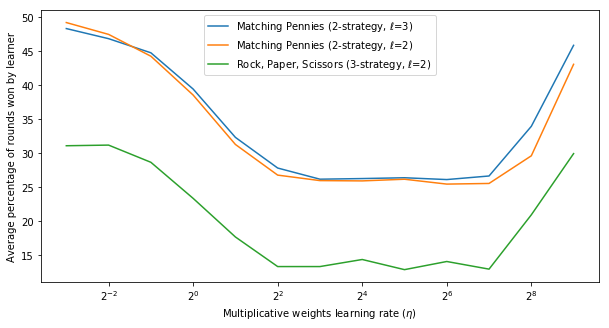

In [98]:
# Adversaries
etas = [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512]

MP_userscore = np.array([96.52,98.8,99.63,100,100,100,100,100,100,100,100,100,100]) # average of 100
MP_learnerscore = np.array([90.28,87.07,80.76,65.13,47.79,38.56,35.48,35.65,35.87,35.38,36.35,51.42,84.73])
MP2_userscore = np.array([95.96,97.24,99.91,100,100,100,100,100,100,100,100,100,100]) # average of 100
MP2_learnerscore = np.array([92.99,87.89,79.36,62.76,45.55,36.59,35.1,35.02,35.47,34.17,34.34,42.1,75.67])
RPS_userscore = np.array([100,100,100,100,100,100,100,100,100,100,100,100,100]) # average of 20
RPS_learnerscore = np.array([45.15,45.35,40.2,30.5,21.5,15.4,15.4,16.8,14.8,16.4,14.9,26.5,42.75])

# Add up total number of rounds
MP_total = MP_userscore + MP_learnerscore
MP2_total = MP2_userscore + MP2_learnerscore
RPS_total = RPS_userscore + RPS_learnerscore

# Percentage of rounds won by the learner
MP_percent = MP_learnerscore / MP_total * 100
MP2_percent = MP2_learnerscore / MP2_total * 100
RPS_percent = RPS_learnerscore / RPS_total * 100

# Plot percentages
plt.figure(figsize=(10, 5))
plt.plot(etas, MP_percent)
plt.plot(etas, MP2_percent)
plt.plot(etas, RPS_percent)

plt.legend(["Matching Pennies (2-strategy, $\ell$=3)", "Matching Pennies (2-strategy, $\ell$=2)", "Rock, Paper, Scissors (3-strategy, $\ell$=2)"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percentage of rounds won by learner")
plt.xscale("log", basex=2)